
Processing: /mnt/em_data/vishal/data/15042025_tmv_normal/auto/0000000812/image_ctfcor.mrc


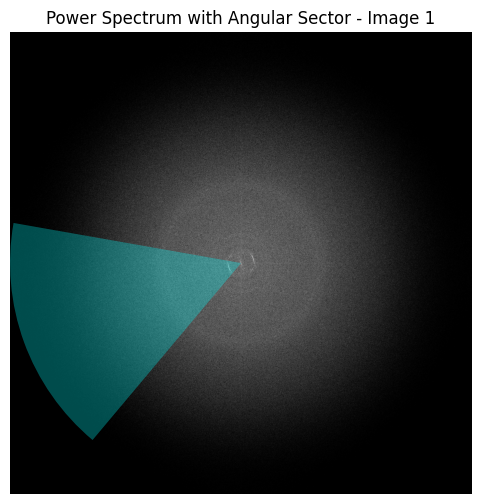

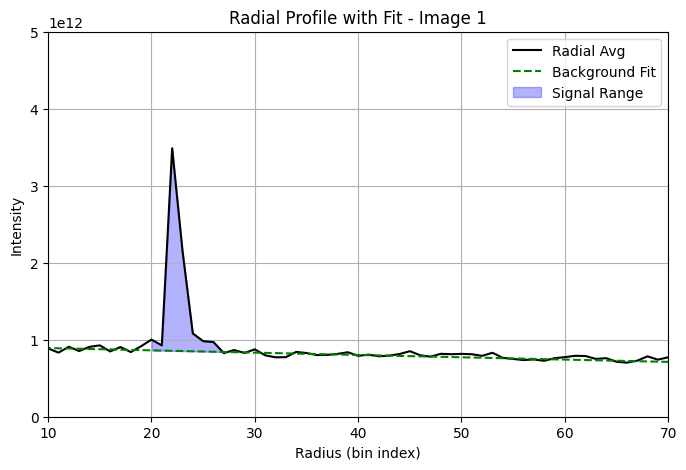

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mrcfile
import matplotlib.patches as patches

# ================================
# PARAMETERS
# ================================

PIXEL_SIZE = 0.653062  # Å/pixel
ANGLE_RANGE = (130, 190)  # Degrees
BIN_WIDTH = 5  # Radial bin width in pixels

# Signal and background ranges (in radial bin indices)
FIT_RANGE = (20, 27)
BG_RANGE_1 = (10, 15)
BG_RANGE_2 = (55, 60)

# ================================
# MRC FILES TO PROCESS
# ================================

mrc_files = [
    '/mnt/em_data/vishal/data/15042025_tmv_normal/auto/0000000812/image_ctfcor.mrc',
    # Add more file paths here if needed
]

# ================================
# FUNCTION DEFINITIONS
# ================================

def compute_power_spectrum(image):
    fft = np.fft.fft2(image)
    return np.fft.fftshift(np.abs(fft) ** 2)

def radial_average_angular_range_binned(data, center=None, angle_range=(0, 360), bin_width=5):
    y, x = np.indices(data.shape)
    if center is None:
        center = np.array(data.shape) // 2

    x -= center[1]
    y -= center[0]

    r = np.sqrt(x**2 + y**2)
    theta = (np.rad2deg(np.arctan2(y, x)) + 360) % 360

    angle_start, angle_end = angle_range
    angle_mask = (theta >= angle_start) & (theta <= angle_end) if angle_start < angle_end else (theta >= angle_start) | (theta <= angle_end)

    r = r[angle_mask]
    values = data[angle_mask]

    r_bin = (r / bin_width).astype(int)
    if len(r_bin) == 0:
        return np.array([])

    max_bin = r_bin.max() + 1
    binned_sum = np.zeros(max_bin)
    binned_count = np.zeros(max_bin)

    np.add.at(binned_sum, r_bin, values)
    np.add.at(binned_count, r_bin, 1)

    with np.errstate(divide='ignore', invalid='ignore'):
        radial_avg = binned_sum / np.maximum(binned_count, 1)
        radial_avg[np.isnan(radial_avg)] = 0

    return radial_avg

def draw_sector(ax, center, radius, angle_range, color='cyan', alpha=0.3):
    angle_start, angle_end = angle_range
    wedge = patches.Wedge(center=center, r=radius,
                          theta1=angle_start, theta2=angle_end,
                          facecolor=color, alpha=alpha, edgecolor='none')
    ax.add_patch(wedge)

# ================================
# MAIN ANALYSIS LOOP
# ================================

radial_averages = []
image_ids = []
intensity_sums = []

for i, filepath in enumerate(mrc_files, start=1):
    print(f"\nProcessing: {filepath}")
    
    try:
        with mrcfile.open(filepath, permissive=True) as mrc:
            image = mrc.data
    except Exception as e:
        print(f"Failed to load {filepath}: {e}")
        continue

    image = image[0] if image.ndim == 3 else image
    power_spec = compute_power_spectrum(image)
    center = (power_spec.shape[0] // 2, power_spec.shape[1] // 2)

    # Visualize power spectrum with sector overlay
    plt.figure(figsize=(6, 6))
    plt.imshow(np.log1p(power_spec), cmap='gray', vmin=25, vmax=30)
    draw_sector(plt.gca(), center=center,
                radius=power_spec.shape[0] // 2,
                angle_range=ANGLE_RANGE)
    plt.title(f'Power Spectrum with Angular Sector - Image {i}')
    plt.axis('off')
    plt.show()

    # Compute radial average
    radial_avg = radial_average_angular_range_binned(
        power_spec, center=center,
        angle_range=ANGLE_RANGE,
        bin_width=BIN_WIDTH
    )

    if len(radial_avg) == 0 or np.all(radial_avg == 0):
        print(f"Image {i}: No valid radial average.")
        continue

    radial_averages.append((i, radial_avg))
    x = np.arange(len(radial_avg))
    y = radial_avg.copy()

    # Background fit using both BG ranges
    bg_mask = ((x >= BG_RANGE_1[0]) & (x <= BG_RANGE_1[1])) | ((x >= BG_RANGE_2[0]) & (x <= BG_RANGE_2[1]))
    x_bg, y_bg = x[bg_mask], y[bg_mask]
    fit_bg = np.polyfit(x_bg, y_bg, 1)
    bg_line = np.polyval(fit_bg, x)

    # Signal extraction
    sig_mask = (x >= FIT_RANGE[0]) & (x <= FIT_RANGE[1])
    signal = y[sig_mask] - bg_line[sig_mask]
    intensity_sum = np.sum(signal)

    # Store results
    image_ids.append(i)
    intensity_sums.append(intensity_sum)

    # Plot radial profile
    plt.figure(figsize=(8, 5))
    plt.plot(x, y, 'k-', label='Radial Avg')
    plt.plot(x, bg_line, 'g--', label='Background Fit')
    plt.fill_between(x[sig_mask], y[sig_mask], bg_line[sig_mask], color='blue', alpha=0.3, label='Signal Range')
    plt.title(f'Radial Profile with Fit - Image {i}')
    plt.xlabel('Radius (bin index)')
    plt.ylabel('Intensity')
    plt.xlim(10, 70)
    plt.ylim(0, 5e12)
    plt.legend()
    plt.grid(True)
    plt.show()




Processing: /mnt/em_data/vishal/data/15042025_tmv_normal/auto/0000000812/image_ctfcor.mrc

Processing: /mnt/em_data/vishal/data/15042025_tmv_normal/auto/0000000813/image_ctfcor.mrc

Processing: /mnt/em_data/vishal/data/15042025_tmv_normal/auto/0000000814/image_ctfcor.mrc

Processing: /mnt/em_data/vishal/data/15042025_tmv_normal/auto/0000000815/image_ctfcor.mrc

Processing: /mnt/em_data/vishal/data/15042025_tmv_normal/auto/0000000816/image_ctfcor.mrc

Processing: /mnt/em_data/vishal/data/15042025_tmv_normal/auto/0000000817/image_ctfcor.mrc

Processing: /mnt/em_data/vishal/data/15042025_tmv_normal/auto/0000000818/image_ctfcor.mrc

Processing: /mnt/em_data/vishal/data/15042025_tmv_normal/auto/0000000819/image_ctfcor.mrc

Processing: /mnt/em_data/vishal/data/15042025_tmv_normal/auto/0000000820/image_ctfcor.mrc

Processing: /mnt/em_data/vishal/data/15042025_tmv_normal/auto/0000000821/image_ctfcor.mrc

Processing: /mnt/em_data/vishal/data/15042025_tmv_normal/auto/0000000822/image_ctfcor.mrc

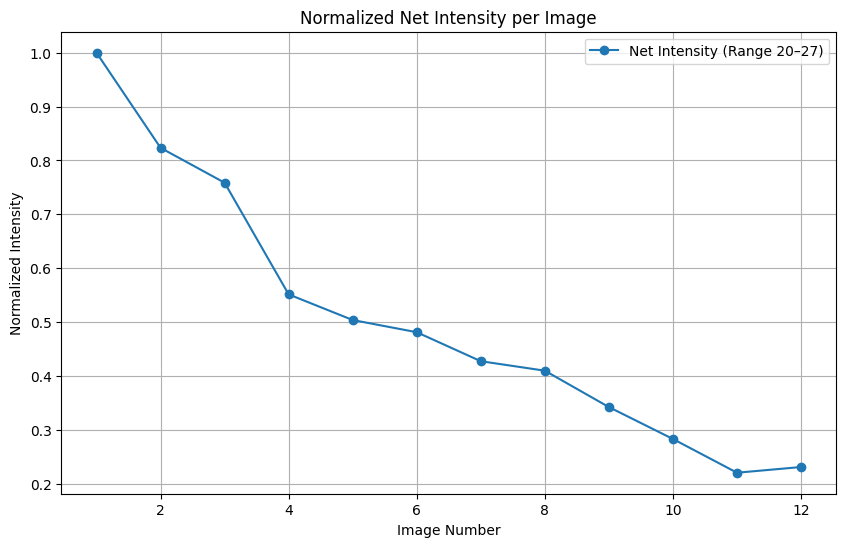

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mrcfile
import matplotlib.patches as patches

# ================================
# PARAMETERS
# ================================

PIXEL_SIZE = 0.653062  # Å/pixel
ANGLE_RANGE = (130, 190)  # Degrees
BIN_WIDTH = 5  # Radial bin width in pixels

# Signal and background ranges (in radial bin indices)
FIT_RANGE = (20, 27)
BG_RANGE_1 = (10, 15)
BG_RANGE_2 = (55, 60)

# ================================
# MRC FILES TO PROCESS
# ================================

mrc_files = [
    '/mnt/em_data/vishal/data/15042025_tmv_normal/auto/0000000812/image_ctfcor.mrc',
    '/mnt/em_data/vishal/data/15042025_tmv_normal/auto/0000000813/image_ctfcor.mrc',
    '/mnt/em_data/vishal/data/15042025_tmv_normal/auto/0000000814/image_ctfcor.mrc',
    '/mnt/em_data/vishal/data/15042025_tmv_normal/auto/0000000815/image_ctfcor.mrc',
    '/mnt/em_data/vishal/data/15042025_tmv_normal/auto/0000000816/image_ctfcor.mrc',
    '/mnt/em_data/vishal/data/15042025_tmv_normal/auto/0000000817/image_ctfcor.mrc',
    '/mnt/em_data/vishal/data/15042025_tmv_normal/auto/0000000818/image_ctfcor.mrc',
    '/mnt/em_data/vishal/data/15042025_tmv_normal/auto/0000000819/image_ctfcor.mrc',
    '/mnt/em_data/vishal/data/15042025_tmv_normal/auto/0000000820/image_ctfcor.mrc',
    '/mnt/em_data/vishal/data/15042025_tmv_normal/auto/0000000821/image_ctfcor.mrc',
    '/mnt/em_data/vishal/data/15042025_tmv_normal/auto/0000000822/image_ctfcor.mrc',
    '/mnt/em_data/vishal/data/15042025_tmv_normal/auto/0000000823/image_ctfcor.mrc'
]

# ================================
# FUNCTION DEFINITIONS
# ================================

def compute_power_spectrum(image):
    fft = np.fft.fft2(image)
    return np.fft.fftshift(np.abs(fft) ** 2)

def radial_average_angular_range_binned(data, center=None, angle_range=(0, 360), bin_width=5):
    y, x = np.indices(data.shape)
    if center is None:
        center = np.array(data.shape) // 2

    x -= center[1]
    y -= center[0]

    r = np.sqrt(x**2 + y**2)
    theta = (np.rad2deg(np.arctan2(y, x)) + 360) % 360

    angle_start, angle_end = angle_range
    angle_mask = (theta >= angle_start) & (theta <= angle_end) if angle_start < angle_end else (theta >= angle_start) | (theta <= angle_end)

    r = r[angle_mask]
    values = data[angle_mask]

    r_bin = (r / bin_width).astype(int)
    if len(r_bin) == 0:
        return np.array([])

    max_bin = r_bin.max() + 1
    binned_sum = np.zeros(max_bin)
    binned_count = np.zeros(max_bin)

    np.add.at(binned_sum, r_bin, values)
    np.add.at(binned_count, r_bin, 1)

    with np.errstate(divide='ignore', invalid='ignore'):
        radial_avg = binned_sum / np.maximum(binned_count, 1)
        radial_avg[np.isnan(radial_avg)] = 0

    return radial_avg

def draw_sector(ax, center, radius, angle_range, color='cyan', alpha=0.3):
    angle_start, angle_end = angle_range
    wedge = patches.Wedge(center=center, r=radius,
                          theta1=angle_start, theta2=angle_end,
                          facecolor=color, alpha=alpha, edgecolor='none')
    ax.add_patch(wedge)

# ================================
# MAIN ANALYSIS LOOP
# ================================

radial_averages = []
image_ids = []
intensity_sums = []

for i, filepath in enumerate(mrc_files, start=1):
    print(f"\nProcessing: {filepath}")
    
    try:
        with mrcfile.open(filepath, permissive=True) as mrc:
            image = mrc.data
    except Exception as e:
        print(f"Failed to load {filepath}: {e}")
        continue

    image = image[0] if image.ndim == 3 else image
    power_spec = compute_power_spectrum(image)
    center = (power_spec.shape[0] // 2, power_spec.shape[1] // 2)

    # Compute radial average
    radial_avg = radial_average_angular_range_binned(
        power_spec, center=center,
        angle_range=ANGLE_RANGE,
        bin_width=BIN_WIDTH
    )

    if len(radial_avg) == 0 or np.all(radial_avg == 0):
        print(f"Image {i}: No valid radial average.")
        continue

    radial_averages.append((i, radial_avg))
    x = np.arange(len(radial_avg))
    y = radial_avg.copy()

    # Background fit using both BG ranges
    bg_mask = ((x >= BG_RANGE_1[0]) & (x <= BG_RANGE_1[1])) | ((x >= BG_RANGE_2[0]) & (x <= BG_RANGE_2[1]))
    x_bg, y_bg = x[bg_mask], y[bg_mask]
    fit_bg = np.polyfit(x_bg, y_bg, 1)
    bg_line = np.polyval(fit_bg, x)

    # Signal extraction
    sig_mask = (x >= FIT_RANGE[0]) & (x <= FIT_RANGE[1])
    signal = y[sig_mask] - bg_line[sig_mask]
    intensity_sum = np.sum(signal)

    # Store results
    image_ids.append(i)
    intensity_sums.append(intensity_sum)

# ================================
# COMPARISON PLOT ACROSS IMAGES
# ================================

if image_ids:
    plt.figure(figsize=(10, 6))
    norm_int = np.array(intensity_sums) / intensity_sums[0]
    plt.plot(image_ids, norm_int, 'o-', label=f'Net Intensity (Range {FIT_RANGE[0]}–{FIT_RANGE[1]})')
    plt.xlabel('Image Number')
    plt.ylabel('Normalized Intensity')
    plt.title('Normalized Net Intensity per Image')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No valid images processed.")

In [5]:
import os
import numpy as np

# Ensure the output folder exists
output_dir = '/home/vikumar/analysis_data/15042025_tmv_normal'
os.makedirs(output_dir, exist_ok=True)

# Save intensity lists
np.savetxt(f'{output_dir}/8.txt', np.array(intensity_sums), delimiter=' ', fmt='%.2f')
print(np.shape(intensity_sums))



(12,)


(12,)
